## Importing libraries

In [1]:
!pip install keras-cv
import keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf2onnx 1.16.1 requires protobuf~=3.20, but you have protobuf 5.29.4 which is incompatible.


In [2]:
!pip install monai tf2onnx onnxruntime onnx onnx2pytorch

  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [3]:
!pip install --upgrade monai[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.5/266.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━

In [4]:
import torch
import onnx

## Convert .keras to onnx model

In [ ]:
import tensorflow as tf
import tf2onnx

#Load .keras file
sequential_model = tf.keras.models.load_model("classification.keras")

# Wrap the Sequential model into a Functional model
inputs = tf.keras.Input(shape=(224, 224, 1))
outputs = sequential_model(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)


spec = (tf.TensorSpec((None, 224, 224, 1), tf.float32, name="input"),)

# Convert to ONNX and save
model_proto, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path="model.onnx")

print("Model successfully converted to ONNX.")




Model successfully converted to ONNX.


## Load ONNX model and convert it to Pytorch model

In [5]:
import torch
import onnx
from onnx2pytorch import ConvertModel

# Load ONNX model
onnx_model = onnx.load("model.onnx")

# Convert to PyTorch
pytorch_model = ConvertModel(onnx_model, experimental=True)

# Move to GPU if available - if working on system not on colab :p
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pytorch_model.to(device)
pytorch_model.eval()



/usr/local/lib/python3.11/dist-packages/onnx2pytorch/convert/layer.py:30: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  layer.weight.data = torch.from_numpy(numpy_helper.to_array(weight))
/usr/local/lib/python3.11/dist-packages/onnx2pytorch/convert/model.py:147: UserWarning: Using experimental implementation that allows 'batch_size > 1'.Batchnorm layers could potentially produce false outputs.
  warnings.warn(


ConvertModel(
  (Reshape_functional_41_1/sequential_1/conv2d_1/BiasAdd__6:0): Reshape(shape=[ -1   1 224 224])
  (Conv_functional_41_1/sequential_1/conv2d_1/BiasAdd:0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (Relu_functional_41_1/sequential_1/conv2d_1/Relu:0): ReLU(inplace=True)
  (MaxPool_functional_41_1/sequential_1/max_pooling2d_1/MaxPool2d:0): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv_functional_41_1/sequential_1/conv2d_1_2/BiasAdd:0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (Relu_functional_41_1/sequential_1/conv2d_1_2/Relu:0): ReLU(inplace=True)
  (MaxPool_functional_41_1/sequential_1/max_pooling2d_1_2/MaxPool2d:0): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv_functional_41_1/sequential_1/conv2d_2_1/BiasAdd:0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (Relu_functional_41_1/sequential_1/conv2d_2_1/Relu:0): ReLU(inplace=True)
  (MaxPool_functional

## Load the dataset

In [6]:
# mount gdrive to load the zip file from google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp '/content/drive/My Drive/Dataset.zip' 'Dataset.zip'

In [8]:
!unzip -q Dataset.zip

In [9]:
import scipy.io as sio

# --- LOAD .mat TEST DATA ---
mat = sio.loadmat('/content/Dataset/Test.mat')
test_data = mat['data']
test_label = mat['label'].flatten()
print(test_label)

[1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 2. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 2. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 2. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 2. 1. 0. 0.
 1. 2. 0. 0. 1. 1. 1. 1. 1. 0. 2. 1. 2. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 2. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 2. 0. 0. 0. 1. 0. 2. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 2. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 2. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 2. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 2. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 2.

In [392]:
index = 38
print(test_label[index])

1.0


In [393]:
import numpy as np

target_image = test_data[index]
target_image = target_image.astype('float32')

In [394]:
print(target_image.shape)

(224, 224)


## GradCAM implementation using MONAI

In [395]:
input_tensor = torch.tensor(target_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)


In [396]:
print("Input tensor shape:", input_tensor.shape)


Input tensor shape: torch.Size([1, 1, 224, 224])


In [397]:
for name, module in pytorch_model.named_modules():
    print(name, ":", module)


 : ConvertModel(
  (Reshape_functional_41_1/sequential_1/conv2d_1/BiasAdd__6:0): Reshape(shape=[ -1   1 224 224])
  (Conv_functional_41_1/sequential_1/conv2d_1/BiasAdd:0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (Relu_functional_41_1/sequential_1/conv2d_1/Relu:0): ReLU()
  (MaxPool_functional_41_1/sequential_1/max_pooling2d_1/MaxPool2d:0): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv_functional_41_1/sequential_1/conv2d_1_2/BiasAdd:0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (Relu_functional_41_1/sequential_1/conv2d_1_2/Relu:0): ReLU()
  (MaxPool_functional_41_1/sequential_1/max_pooling2d_1_2/MaxPool2d:0): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv_functional_41_1/sequential_1/conv2d_2_1/BiasAdd:0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (Relu_functional_41_1/sequential_1/conv2d_2_1/Relu:0): ReLU()
  (MaxPool_functional_41_1/sequential_1/max_pooling2d_

In [398]:
import torch.nn as nn

def replace_relu_inplace(model):
    for name, module in model.named_children():
        if isinstance(module, nn.ReLU) and module.inplace:
            setattr(model, name, nn.ReLU(inplace=False))
        else:
            replace_relu_inplace(module)


replace_relu_inplace(pytorch_model)


In [399]:
from monai.visualize import GradCAM

target_layer = "Conv_functional_41_1/sequential_1/conv2d_4_1/BiasAdd:0"
cam = GradCAM(pytorch_model, target_layers=target_layer)
grayscale_cam = cam(input_tensor)[0, 0].cpu().detach().numpy()
print("CAM shape:", grayscale_cam.shape)


CAM shape: (224, 224)


In [400]:
outputs = pytorch_model(input_tensor)
predicted_class = torch.argmax(outputs, dim=1).item()
predicted_class_name = ["No infection","Mild infection","Severe Infection"]
print("Predicted class index:", predicted_class)
print("Predicted class name:",predicted_class_name[predicted_class])
ground_truth = test_label[index]

if ground_truth == predicted_class:
  model_ans = "correct"
else:
  model_ans = "incorrect"

print(f"Prediction {model_ans}")



Predicted class index: 1
Predicted class name: Mild infection
Prediction correct


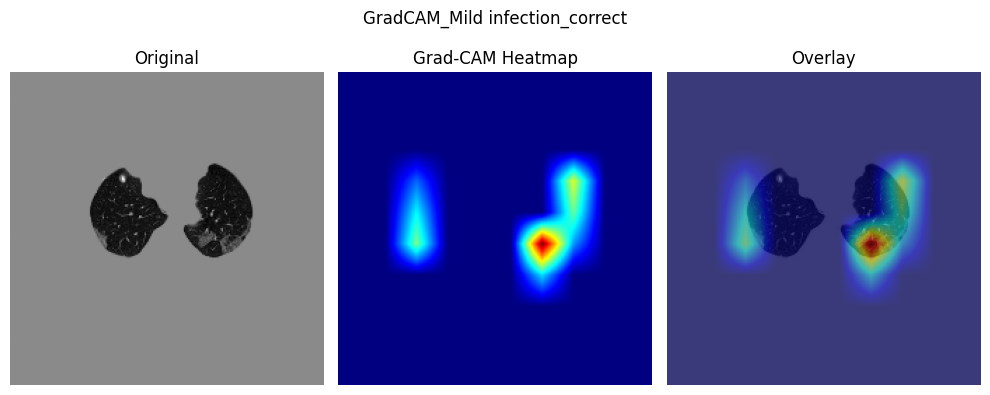

In [401]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


img = target_image

# Normalize image for display
img_np = img.squeeze()
if img_np.max() > 1:
    img_np = img_np / 255.0

# Resize CAM to match image size
cam_resized = cv2.resize(grayscale_cam, (img_np.shape[1], img_np.shape[0]))
# Normalize with reversed range
cam_normalized = (cam_resized.max() - cam_resized) / (cam_resized.max() - cam_resized.min())


# Apply the colormap
heatmap = cv2.applyColorMap((cam_normalized * 255).astype(np.uint8), cv2.COLORMAP_JET)

heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB) / 255.0

# Overlay
overlayed_image = 0.5 * heatmap + 0.5 * np.stack([img_np]*3, axis=-1)


plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img_np, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(heatmap)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(overlayed_image)
plt.axis('off')

plt.suptitle(f"GradCAM_{predicted_class_name[predicted_class]}_{model_ans}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
